# Plot two examples of vKdV with inputs as outputs


In [104]:
import xarray as xr
from iwaves.kdv.vkdv import vKdV
from iwaves.utils.iwaveio import vkdv_from_netcdf
from iwaves.utils.viewer import viewer

from soda.utils.otherplot import axcolorbar

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams

In [2]:
%matplotlib inline

In [3]:
# Set font sizes
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "14"
rcParams['axes.labelsize']='large'

In [301]:
# Load the simulation complete

clims = [-1.0,1.0]
H = 250.

kdvdir = '../../kdv_solutions_magnus/'
# Summer case (wave of elevation)
#kdvfile = '../KDVCONVERGENCE_OUTPUT/KdV_BrowseBasin_20080121_dx025_dt04a0075_Lw040000_mode1_nuH01.nc'
t1 = '2017-04-02'
kdvfile1 = '%s/a0_optimize/kdv_optimal_a0_Prelude_%s.nc'%(kdvdir,t1)
ekdvfile1 = '%s/a0_optimize/ekdv_optimal_a0_Prelude_%s.nc'%(kdvdir,t1)


# Winter case (wave of elevation)
t2 = '2016-07-09'
#t2 = '2017-03-18'

kdvfile2 = '%s/a0_optimize/kdv_optimal_a0_Prelude_%s.nc'%(kdvdir,t2)
ekdvfile2 = '%s/a0_optimize/ekdv_optimal_a0_Prelude_%s.nc'%(kdvdir,t2)

    

In [302]:
mykdv1, B1 = vkdv_from_netcdf(kdvfile1)
mykdv2, B2 = vkdv_from_netcdf(kdvfile2)

ds1= xr.open_dataset(kdvfile1)
ds2= xr.open_dataset(kdvfile2)


eds1= xr.open_dataset(ekdvfile1)
eds2= xr.open_dataset(ekdvfile2)

eds1

<xarray.Dataset>
Dimensions:   (time: 540, timefast: 8640, x: 3001, z: 123)
Coordinates:
  * x         (x) float64 -1e+03 -950.0 -900.0 ... 1.489e+05 1.49e+05 1.49e+05
  * z         (z) float64 -0.0 -4.99 -9.981 -14.97 ... -598.8 -603.8 -608.8
  * time      (time) float64 240.0 480.0 720.0 ... 1.291e+05 1.294e+05 1.296e+05
  * timefast  (timefast) float64 15.0 30.0 45.0 ... 1.296e+05 1.296e+05
Data variables:
    B         (x) float64 ...
    Alpha     (x) float64 ...
    Beta      (x) float64 ...
    Qterm     (x) float64 ...
    r20       (x) float64 ...
    h         (x) float64 ...
    Cn        (x) float64 ...
    X         (z, x) float64 ...
    Z         (z, x) float64 ...
    rhoZ      (z, x) float64 ...
    Phi       (z, x) float64 ...
    phi01     (z, x) float64 ...
    phi10     (z, x) float64 ...
    phi20     (z, x) float64 ...
    D01       (z, x) float64 ...
    D10       (z, x) float64 ...
    D20       (z, x) float64 ...
    B_t       (time, x) float64 ...
    B_pt   

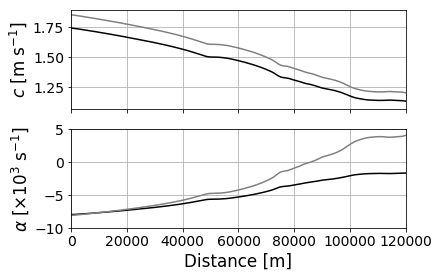

In [303]:
# Plot alpha and c_n for the two cases
plt.figure()
ax1=plt.subplot(211)
plt.plot(mykdv1.x, mykdv1.Cn,'k')
plt.plot(mykdv2.x, mykdv2.Cn,'0.5')
plt.xlim(0,1.2e5)
#plt.ylim(-7,7)
plt.grid(b=True)
ax1.set_xticklabels([])
plt.ylabel(r'$c$ [m s$^{-1}$]')


plt.subplot(212)
ax2=plt.plot(mykdv1.x, mykdv1.Alpha*1e3,'k')
plt.plot(mykdv2.x, mykdv2.Alpha*1e3,'0.5')
plt.xlim(0,1.2e5)
plt.ylim(-10,5)
plt.ylabel(r'$\alpha$ [$\times 10^3$ s$^{-1}$]')
plt.xlabel('Distance [m]')
plt.grid(b=True)

In [304]:
# Viewer is hard to make look good...
def plot_scene(mykdv, Bt, tstep):
    
    mykdv.B[:] = Bt.values[tstep,:]
    # Calculate the velocity and density fields
    rho = mykdv.calc_density(nonlinear=True)
    u,w = mykdv.calc_velocity(nonlinear=True)
    
    ax = plt.subplot2grid((3,1),(0,0))
    plt.plot(mykdv.x, mykdv.B ,'0.5')
    plt.xlim(1e4,12e4)
    ax.set_xticklabels([])
    plt.ylim(-100,100)
    plt.ylabel('$A$ [m]')
    ax.text(0.05,0.9, '(a)', transform=ax.transAxes)
    plt.grid(b=True)
    
    ax = plt.subplot2grid((3,1),(1,0),rowspan=2, facecolor='0.5')
    p1= plt.pcolormesh(mykdv.X, mykdv.Z, u.T, 
        #cmap='RdBu_r',\
        vmin=clims[0], vmax=clims[1], cmap='RdBu_r')
    #cb=plt.colorbar(orientation='horizontal')
    #cb.ax.set_title('u [m/s]')
    plt.contour(mykdv.X, mykdv.Z, rho.T, np.arange(20.,30.,0.25),\
            colors='k', linewidths=0.5)
    
    plt.plot([101500,101500],[-250,0],'m--')
    plt.xlim(1e4,12e4)

    plt.xlabel('Distance [m]')
    plt.ylabel('Depth[m]')
    ax.text(0.05,0.9, '(b)', transform=ax.transAxes)

    plt.xlim(1e4,12e4)
    
    cb = axcolorbar(p1, ax=ax,pos=[0.6,0.1,0.2,0.05])
    cb.set_ticks([clims[0],0, clims[1]])
    cb.ax.set_title('u [m/s]')

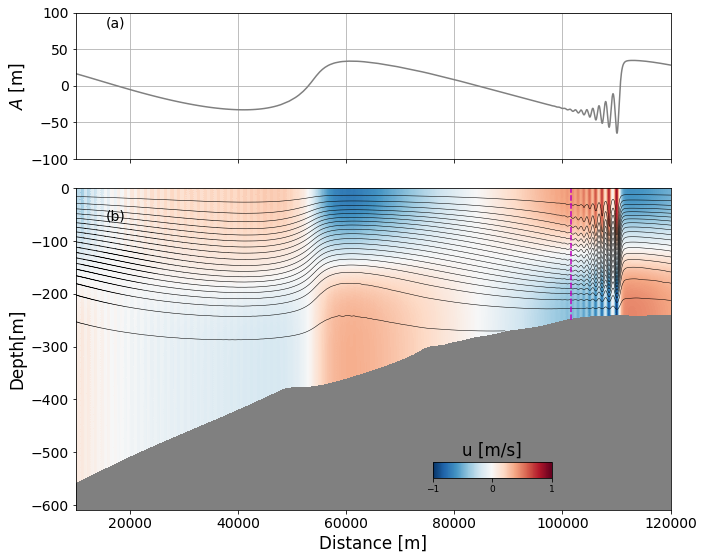

In [305]:
plt.figure(figsize=(10,8))
plot_scene(mykdv1,B1,-30)

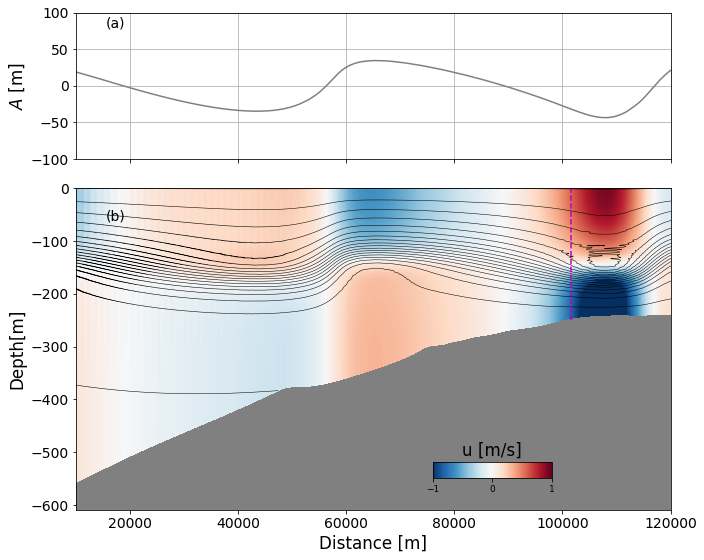

In [306]:
plt.figure(figsize=(10,8))
plot_scene(mykdv2,B2,-30)

In [307]:
# Load the stratification input data
ds_S = xr.open_dataset('../../run_ddcurves/DATA_SHELL/ShellCrux_Uniltered_Density_BHM_VI_20162017_nliw.nc')
ds_S

<xarray.Dataset>
Dimensions:   (ensemble: 2000, params: 6, time: 374)
Coordinates:
  * time      (time) datetime64[ns] 2016-04-29T23:15:00 ... 2017-05-07T06:40:00
  * ensemble  (ensemble) int64 0 1 2 3 4 5 6 ... 1994 1995 1996 1997 1998 1999
  * params    (params) int64 0 1 2 3 4 5
Data variables:
    cn        (time, ensemble) float64 ...
    alpha     (time, ensemble) float64 ...
    beta      (params, time, ensemble) float64 ...

In [308]:
# Now we want to plot the full uncertainty for both cases
ds_A = xr.open_dataset('../output/2019-07-11--01-47-43_magnus_kdv_runs.nc')
# update the time
ds_A['time'].values[:] = ds_S['time'].values[0:ds_A.time.shape[0]]
ds_A['time']
ds_A

<xarray.Dataset>
Dimensions:   (ensemble: 500, params: 6, time: 372)
Coordinates:
  * time      (time) int64 1461971700000000000 ... 1493966400000000000
  * ensemble  (ensemble) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * params    (params) int64 0 1 2 3 4 5
Data variables:
    amax      (ensemble, time) float64 ...
    tmax      (ensemble, time) float64 ...
    a0        (ensemble, time) float64 ...
    cn        (ensemble, time) float64 ...
    alpha     (ensemble, time) float64 ...
    cn_mu     (ensemble, time) float64 ...
    alpha_mu  (ensemble, time) float64 ...
    beta      (time, ensemble, params) float64 ...
    ubed      (ensemble, time) float64 ...
    usurf     (ensemble, time) float64 ...

In [309]:
# Locate the time index
ds_A_t1 = ds_A.sel(time=np.datetime64(t1,'ns').astype(int), method='nearest')
ds_A_t2 = ds_A.sel(time=np.datetime64(t2,'ns').astype(int), method='nearest')

/home/suntans/.conda/envs/soda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, '$A_{max}$ [m]')

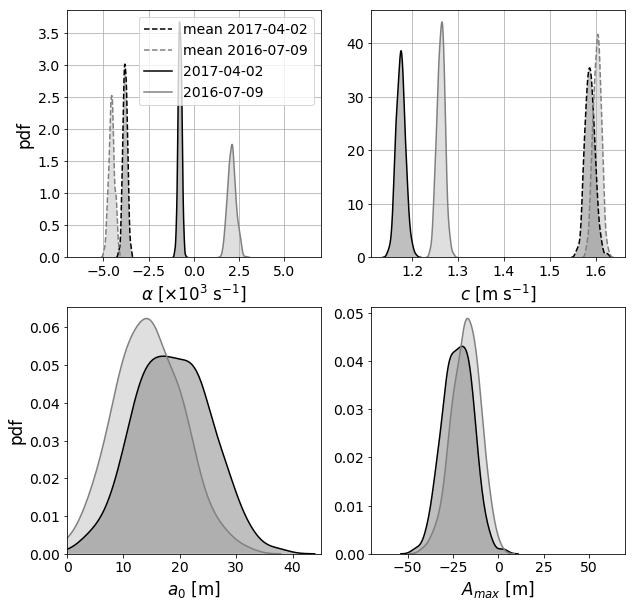

In [312]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.kdeplot(ds_A_t1.alpha_mu*1e3, color='k',shade=True, legend=False, ls='--')
sns.kdeplot(ds_A_t2.alpha_mu*1e3, color='0.5',shade=True, legend=False, ls='--')

sns.kdeplot(ds_A_t1.alpha*1e3, color='k',shade=True, legend=False)
sns.kdeplot(ds_A_t2.alpha*1e3, color='0.5',shade=True, legend=False)


plt.ylabel('pdf')
plt.legend(('mean %s'%t1,'mean %s'%t2,t1,t2))
plt.xlabel(r'$\alpha$ [$\times 10^3$ s$^{-1}$]')
plt.xlim(-7,7)
plt.grid(b=True)

plt.subplot(222)

sns.kdeplot(ds_A_t1.cn, color='k',shade=True, legend=False)
sns.kdeplot(ds_A_t2.cn, color='0.5',shade=True, legend=False)

sns.kdeplot(ds_A_t1.cn_mu, color='k',shade=True, legend=False, ls='--')
sns.kdeplot(ds_A_t2.cn_mu, color='0.5',shade=True, legend=False, ls='--')
plt.xlabel('$c$ [m s$^{-1}$]')
plt.grid(b=True)

plt.subplot(223)
plt.ylabel('pdf')

sns.kdeplot(ds_A_t1.a0, color='k',shade=True, legend=False)
sns.kdeplot(ds_A_t2.a0, color='0.5',shade=True, legend=False)
plt.xlim(0,45)
plt.xlabel('$a_0$ [m]')

plt.subplot(224)

sns.kdeplot(ds_A_t1.amax, color='k',shade=True, legend=False)
sns.kdeplot(ds_A_t2.amax, color='0.5',shade=True, legend=False)
plt.xlim(-70,70)
plt.xlabel('$A_{max}$ [m]')

/home/suntans/.conda/envs/soda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


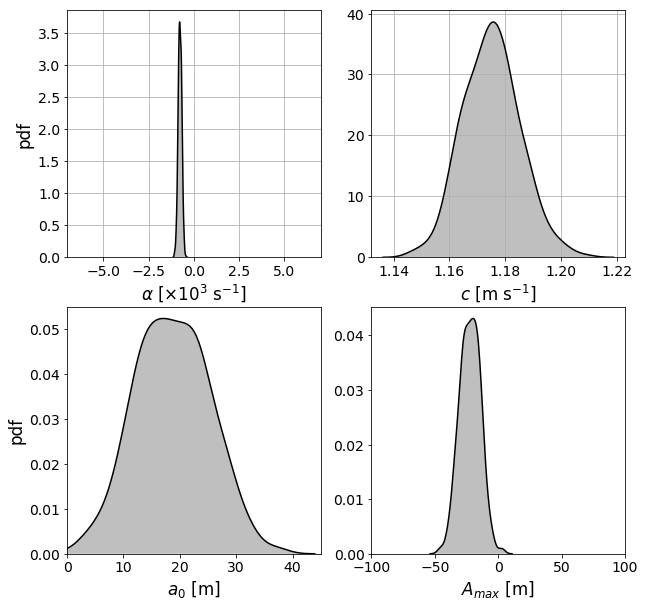

In [313]:
def plot_kde_inputs(ds_A_t):
    plt.figure(figsize=(10,10))
    plt.subplot(221)


    sns.kdeplot(ds_A_t.alpha*1e3, color='k',shade=True, legend=False)
    plt.ylabel('pdf')
    plt.xlim(-7,7)
    plt.grid(b=True)
    plt.xlabel(r'$\alpha$ [$\times 10^3$ s$^{-1}$]')


    plt.subplot(222)

    sns.kdeplot(ds_A_t.cn, color='k',shade=True, legend=False)

    plt.xlabel('$c$ [m s$^{-1}$]')
    plt.grid(b=True)

    plt.subplot(223)

    sns.kdeplot(ds_A_t.a0, color='k',shade=True, legend=False)
    plt.xlim(0,45)
    plt.xlabel('$a_0$ [m]')
    plt.ylabel('pdf')


    plt.subplot(224)

    sns.kdeplot(ds_A_t.amax, color='k',shade=True, legend=False)
    plt.xlim(-100,100)
    plt.xlabel('$A_{max}$ [m]')
    
plot_kde_inputs(ds_A_t1)

In [314]:
# Load the amplitude observations and compare...

###########
ncfile = '/home/suntans/Share/ARCHub/DATA/FIELD/ShellCrux/KP150_Fitted_Buoyancy_wout_motion.nc'
mode = 0
###########

dsb1 = xr.open_dataset(ncfile,group='KP150_phs1')
dsb2 = xr.open_dataset(ncfile,group='KP150_phs2')

# Merge the two

A_n = xr.concat([dsb1['A_n'][:,mode],dsb2['A_n'][:,mode]], dim='time')
#a0 = xr.concat([ds1['amp'][:,mode,0],ds2['amp'][:,mode,0]], dim='timeslow')

# Quality control
A_n.loc['2016-09-18':'2016-10-31']=np.nan




In [315]:
def maximum_amplitude_finder_v1(amp_signal):
    amp_min = np.min(amp_signal)
    amp_max = np.max(amp_signal)
    if np.abs(amp_min)>amp_max:
        return amp_min, np.argwhere(amp_signal==amp_min)[0][0]
    else:
        return amp_max, np.argwhere(amp_signal==amp_max)[0][0]


def maximum_amplitude_finder(amp_signal):
    amp_min = np.min(amp_signal)
    amp_max = np.max(amp_signal)
    if np.abs(amp_min)>amp_max:
        bidx = (amp_signal>=amp_min) & (amp_signal<= amp_min -0.01*amp_min)
        idx = np.argwhere(bidx)
        return amp_min, idx[-1][-1]
    else:
        bidx = (amp_signal<=amp_max) & (amp_signal>= amp_max -0.01*amp_max)
        idx = np.argwhere(bidx)
        return amp_max, idx[-1][-1]
    
#Amax, tidx = maximum_amplitude_finder(A_n.sel(time=slice(t1dt,t2dt)).values)
#tmax = A_n.sel(time=slice(t1dt,t2dt)).time[tidx].values

#plt.figure()
t1dt = np.datetime64(t1)
t2dt = t1dt + np.timedelta64(1,'D')
A1 = A_n.sel(time=slice(t1dt,t2dt))

t1dt = np.datetime64(t2)
t2dt = t1dt + np.timedelta64(1,'D')
A2 = A_n.sel(time=slice(t1dt,t2dt))

7680
[-32.         -31.99583333 -31.99166667 ...   3.9875       3.99166667
   3.99583333]
7737
[-32.2375     -32.23333333 -32.22916667 ...   3.75         3.75416667
   3.75833333]
1166
[-19.43333333 -19.41666667 -19.4        ...   4.53333333   4.55
   4.56666667]


Text(0.5, 0, 'Time [h]')

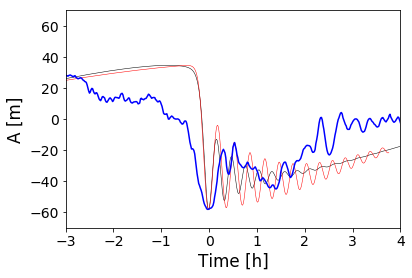

In [316]:
def plot_centered_A( time, amp_signal, **kwargs):
    Am, tidx = maximum_amplitude_finder(amp_signal)
    print(tidx)
    
    timeplot = time - time[tidx]
    print(timeplot)
    plt.plot(timeplot, amp_signal, **kwargs)

plt.figure()
plot_centered_A(ds1.timefast.values/3600, ds1.B_pt.values,color='k',lw=0.5)
plot_centered_A(eds1.timefast.values/3600, eds1.B_pt.values,color='r',lw=0.5)

plot_centered_A(A1.time.values.astype(int)*1e-9/3600, A1.values, color='b')
#plot_centered_A(ds2.timefast.values/3600, ds2.B_pt.values,color='0.5')
plt.ylim(-70,70)
plt.xlim(-3,4)
#plt.grid(b=True)
plt.ylabel('A [m]')
plt.xlabel('Time [h]')

4825
[-20.10416667 -20.1        -20.09583333 ...  15.88333333  15.8875
  15.89166667]
8183
[-34.09583333 -34.09166667 -34.0875     ...   1.89166667   1.89583333
   1.9       ]
476
[-7.93333333 -7.91666667 -7.9        ... 16.03333333 16.05
 16.06666667]


Text(0.5, 0, 'Time [h]')

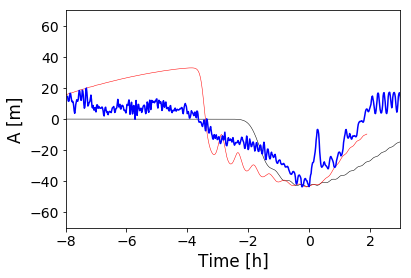

In [317]:
plt.figure()
plot_centered_A(ds2.timefast.values/3600, ds2.B_pt.values,color='k',lw=0.5)
plot_centered_A(eds2.timefast.values/3600, eds2.B_pt.values,color='r',lw=0.5)

plot_centered_A(A2.time.values.astype(int)*1e-9/3600, A2.values, color='b')
#plot_centered_A(ds2.timefast.values/3600, ds2.B_pt.values,color='0.5')
plt.ylim(-70,70)
plt.xlim(-8,3)
#plt.grid(b=True)
plt.ylabel('A [m]')
plt.xlabel('Time [h]')